This is where I'll record my work on the Quora Project. -- Brian

In [1]:
%matplotlib inline

import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json, os, re, shutil, sys, time
import collections, itertools
import nltk
# nltk.download()
import scipy.sparse
import utils
from nltk.corpus import treebank
# import gensim
# import tensorflow as tf -- use this on Google Cloud only

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn import metrics

# Your code
# import quoralm
# reload(quoralm)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Generate training data dataframe
train = pd.read_csv('train.csv') #index_col=0

In [3]:
# Generate test data dataframe
# test = pd.read_csv('test.csv') #, index_col=0)

In [4]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


My goal here is to generate features (could be applicable to training and test sets, independently, but will work with training first, then take what works and apply to test set as well).

Do we want to create two corpuses of the same length and compare? Or can we do that all in pandas?

In [5]:
# Create corpus of first questions -- everything I have done below (aside from generating the dataframe for question2) is on question1

train_question_1 = train['question1'].tolist()
# tfidf = TfidfVectorizer(stop_words='english') #tokenizer=tokenize, 
# tfs1 = tfidf.fit_transform(train_question_1)

# print(train_question_1)

In [6]:
# Create corpus of second questions

train_question_2 = train['question2'].tolist()

# print(train_question_2)

In [30]:
training_list_1 = []

for item in train_question_1:
     training_list_1.append(nltk.word_tokenize(unicode(item, 'utf-8')))

# for item in train_question_1:
#     training_list_1.append(nltk.word_tokenize(unicode(item, 'utf-8')))   #(item.decode('utf-8', 'ignore')))

In [25]:
# I believe this worked for me earlier to switch back to ascii, but it's not working now?

for i in range(0,len(training_list_1)):
    for tokens in training_list_1[i]:
        tokens.encode('ascii', 'ignore')
    
# print test

In [26]:
test_list_1 = []

for tagged in training_list_1:
    test_list_1.append(nltk.pos_tag(tagged))

In [35]:
test_list_1

[[(u'What', 'WP'),
  (u'is', 'VBZ'),
  (u'the', 'DT'),
  (u'step', 'NN'),
  (u'by', 'IN'),
  (u'step', 'NN'),
  (u'guide', 'RB'),
  (u'to', 'TO'),
  (u'invest', 'VB'),
  (u'in', 'IN'),
  (u'share', 'NN'),
  (u'market', 'NN'),
  (u'in', 'IN'),
  (u'india', 'NN'),
  (u'?', '.')],
 [(u'What', 'WP'),
  (u'is', 'VBZ'),
  (u'the', 'DT'),
  (u'story', 'NN'),
  (u'of', 'IN'),
  (u'Kohinoor', 'NNP'),
  (u'(', '('),
  (u'Koh-i-Noor', 'NNP'),
  (u')', ')'),
  (u'Diamond', 'NNP'),
  (u'?', '.')],
 [(u'How', 'WRB'),
  (u'can', 'MD'),
  (u'I', 'PRP'),
  (u'increase', 'VB'),
  (u'the', 'DT'),
  (u'speed', 'NN'),
  (u'of', 'IN'),
  (u'my', 'PRP$'),
  (u'internet', 'JJ'),
  (u'connection', 'NN'),
  (u'while', 'IN'),
  (u'using', 'VBG'),
  (u'a', 'DT'),
  (u'VPN', 'NNP'),
  (u'?', '.')],
 [(u'Why', 'WRB'),
  (u'am', 'VBP'),
  (u'I', 'PRP'),
  (u'mentally', 'RB'),
  (u'very', 'RB'),
  (u'lonely', 'RB'),
  (u'?', '.'),
  (u'How', 'WRB'),
  (u'can', 'MD'),
  (u'I', 'PRP'),
  (u'solve', 'VB'),
  (u'it', 'PR

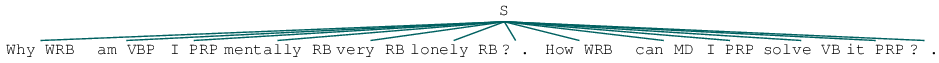

In [34]:
# entities_1 = []

# for f in range(0, len(test_list_1)):
#     for q in test_list_1[f]:
#         entities_1.append(nltk.chunk.ne_chunk(q))
    
entities = nltk.chunk.ne_chunk(test_list_1[3])
entities

In [ ]:
# t = treebank.parsed_sents('wsj_0001.mrg')[0]
# t.draw()

Will keep relevant links here: 

https://radimrehurek.com/gensim/tut1.html. "from strings to vectors"

https://www.codeproject.com/Articles/11835/WordNet-based-semantic-similarity-measurement

http://www.nltk.org basic information on text manipulation